# Project Description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

# Project Stages
 1.  Open the data file and study the general information
 2.  Prepare the data
 3.  Analyze the data
 4.  Create a user profile for each region
 5.  Test the hypotheses
 6.  Write a general conclusion
 
# Data Description
 -  Name
 -  Platform
 -  Year of Release
 -  Genre
 -  NA_sales (North American sales in USD million)
 -  EU_sales (sales in Europe in USD million)
 -  JP_sales (sales in Japan in USD million)
 -  Other_sales (sales in other countries in USD million)
 -  Critic_Score (maximum of 100)
 -  User_Score (maximum of 10)
 -  Rating (ESRB)

____
____
____

##  Open the data file and study the general information

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# importing all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [3]:
try:
    df = pd.read_csv('/Users/yoheved/Desktop/Study/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')
        

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
df.sample(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
3994,Rayman Advance,GBA,2001.0,Platform,0.36,0.13,0.00,0.01,84.0,8.4,E
11268,50 Cent: Bulletproof,PSP,2006.0,Action,0.08,0.00,0.00,0.01,NaN,NaN,NaN
12364,Steins;Gate: Senkei Kousoku no Phonogram,PS3,2013.0,Adventure,0.00,0.00,0.06,0.00,NaN,NaN,NaN
14548,Bubble Bobble Evolution,PSP,2006.0,Puzzle,0.03,0.00,0.00,0.00,47.0,tbd,E
5626,Vin Diesel: Wheelman,PS3,2009.0,Racing,0.12,0.14,0.00,0.05,NaN,NaN,NaN
11558,Witches & Vampires: The Secrets of Ashburry,DS,2010.0,Adventure,0.05,0.02,0.00,0.01,NaN,NaN,NaN
3528,Disgaea 4: A Promise Unforgotten,PS3,2011.0,Role-Playing,0.27,0.11,0.14,0.05,80.0,7.8,T
11057,The X-Factor,X360,2010.0,Misc,0.00,0.08,0.00,0.01,NaN,NaN,NaN
752,Yu-Gi-Oh: Duel Monsters 4,GB,2000.0,Role-Playing,0.00,0.00,2.17,0.01,NaN,NaN,NaN
4979,NCAA Football 08,PS3,2007.0,Sports,0.35,0.00,0.00,0.03,77.0,7.9,E


In [6]:
df.isna().sum() * 100 / len(df)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

### Conclusion
We have a dataset with historical information of different games for different platforms. The dataset concists of 11 columns and 16715 rows. We have such data types as float64 - 6 columns and object - 5 columns. On the first look what we can do are: convert names of columns to the lower case so it will be more comfortable to work with them later, need to convert values in Year of Realease column from float to int, so it will be more logical. After checking missing values I saw that there are a lot in columns Critic_score, User_Score and Rating. On the first look I noticed that those missing values we have for games with low sells or old games, need to check if we have correlation between those factors. Since ESRB rating was founded only in 1994 maybe for some not popular old games there was no rating, because they only started to work. Same with score, for old games it is hard to find a user and critic scores, since those times wasn't so big internet community and gamers weren't able to share their thoughts with each other, only with their friens. Also I noticed a value tbd in user_score, which means that scoring in progress, I guess. But again the sells for those games which I saw are very low, need to examine if we have a correlation between it.

_____
_____
_____


## Prepare the data

# To do list:
 1.  Replace the column names (make them lowercase).
 2.  Convert the data to the required types.
 3.  Describe the columns where the data types have been changed and why.
 4.  If necessary, decide how to deal with missing values:
      -  Explain why you filled in the missing values as you did or why you decided to leave them blank.
      -  Why do you think the values are missing? Give possible reasons.
      -  Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
 5.  Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [7]:
#replacing the column names (making them lowercase)
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Now will take a look in the column year_of_release. As we saw before it is a float64 type and we had there only 1.61% of missing values. 

In [8]:
df[df['year_of_release'].isna()].head(20)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Ok, I see that some games have the year in the name but since we have only around 2% of missing values it will not affect our calculations if we will drop the rows with missing values. And then convert it to the int type

In [9]:
df = df.dropna(subset=['year_of_release'])

In [10]:
df['year_of_release'] = df['year_of_release'].astype('int')
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Done! Now let's continue to work with the other columns

In [11]:
df[df['name'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We have only 2 missing values in the 'name' column. We can also drop them

In [12]:
df = df.dropna(subset=['name'])

In [13]:
df['name'].isna().sum()

0

In [14]:
df['genre'].isna().sum()

0

Great! Now we have only 3 columns with missing values, let's investigate what we can do with them

In [15]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

We have a 'tbd' value which means that we don't have score at the moment, so it can be replaced witn nan and conveted to the float type


In [16]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan
df['user_score'] = df['user_score'].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [17]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In columns critic_score, user_score and rating we have a lot of missing values: 51%, 40% and 40% accordingly. We can't just drop all those values since it will crash all our futher calculations. Also we can't replace them with mean or median value since the system of scoring is complicated and we don't know how users and critics give their scores to games. Let's investigate what is the reason of such a big amount of missing values in those columns. Let's see how much missing values we have during the years

In [18]:
critic_nan  = (df
                 .loc[df['critic_score'].isna()==True]
                 .pivot_table(index='year_of_release', values='name', aggfunc='count')
                 .reset_index()
                     )
users_nan = (df
                .loc[df['user_score'].isna()==True]
                .pivot_table(index='year_of_release', values='name', aggfunc='count')
                .reset_index()
                     )
rating_nan =(df
                .loc[df['rating'].isna()==True]
                .pivot_table(index='year_of_release', values='name', aggfunc='count')
                .reset_index()
                     )
all_nan = critic_nan.merge(users_nan, on='year_of_release', how='left')
all_nan = all_nan.merge(rating_nan, on='year_of_release', how='left')
all_nan

,year_of_release,name_x,name_y,name
0,1980,9,9,9
1,1981,46,46,46
2,1982,36,36,36
3,1983,17,17,17
4,1984,14,14,14
5,1985,13,13,13
6,1986,21,21,21
7,1987,16,16,16
8,1988,14,14,14
9,1989,17,17,17


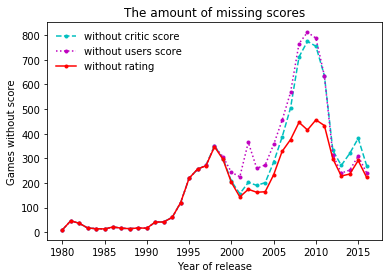

In [19]:
fig, ax = plt.subplots()
ax.set(title='The amount of missing scores',
       xlabel='Year of release', ylabel='Games without score')
ax.plot(critic_nan['year_of_release'], critic_nan['name'], '.--c', label='without critic score')
ax.plot(users_nan['year_of_release'], users_nan['name'], '.:m', label='without users score')
ax.plot(rating_nan['year_of_release'], rating_nan['name'], '.-r', label='without rating')
ax.grid=True
ax.legend(frameon=False)
plt.show()

In [20]:
df['rating'].fillna('unknown', inplace=True)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [21]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


### Conclusion
After examinating of the data we have I found 2 columns with data types needed to convert. So I converted year_of_release column from float type to int and user_score from object type to float. Also I changed the names of the columns to the lowercase, and now it is more comfortable to work with them. In columns name, year_of_release and genre we had a missing values, but it was such a small percent that I decided to drop all missing values from those columns. And very interesting situation we have in columns critic_score, user_score and rating. Since we have a big percentage of missing values there I was needed to analyze what can be a reason of it. After researching I can assume that those 3 columns are connected between each other. Till the 1997 this is very logical that we have missing values because game industry a little bit elder than internet itself. Internet for people usage started to work in 90's but in our data we have games released at 80's and it is obvious that we don't have any scores or raiting for them, since that time people didn't have a lot opportunities to share their thoughts with other people except their friends. The ESRB rating was founded only in 1994, so we have 10 years at least when games were without any rating. Interesting that till the 1997 we have equal amount of missing values for those 3 columns. But after we can see that in 00's gameindustry started to grow very fast, and each year we have more and more missing values in user and critic_score columns and less in rating column, which can say us that ESRB works pretty good and try to give the rating to as much new games as possible, while critics and users may not be so attitude. As usual we have critic and user scores for famous and popular games with good advertising campaign, but still we have more and more new games each year which are not so popular and a lot of people don't pay any attention of them, such as critics. I decided don't remove those missing values since I think it make sence that we don't have scores or ratings for games and repplacing or dropping missing values will affect results of further calculations a lot.

____
____
____

## Analyze the data

# To do list:
 -  Look at how many games were released in different years. Is the data for every period significant?
 -  Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
 -  Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
 -  Work only with the data that you've decided is relevant. Disregard the data for previous years.
 -  Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
 -  Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
 -  Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
 -  Keeping your conclusions in mind, compare the sales of the same games on other platforms.
 -  Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

### Analyzing the amount of games that were released in different years.

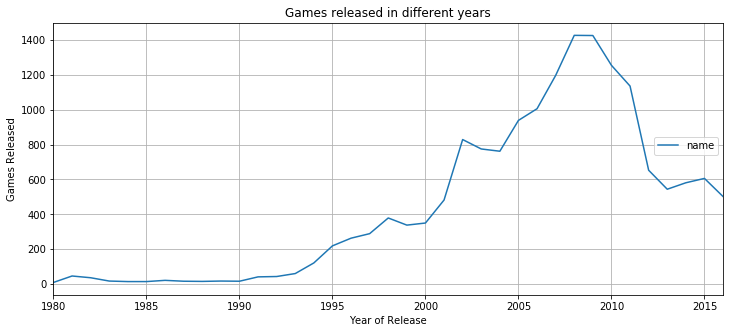

In [22]:
(df 
          .pivot_table(index='year_of_release', values='name', aggfunc='count')
          .plot(grid=True, figsize=(12, 5))
)
plt.xlabel("Year of Release")
plt.ylabel("Games Released")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.title("Games released in different years")
plt.show()

As we see the amount of games released grew up since 1980 and till 2008. In 2006-2008 was the biggest amount of games released. And then we see that releasing of new games reduced dramatically up to 2013.

### Researching at how sales varied from platform to platform. Choosing the platforms with the greatest total sales and building a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?

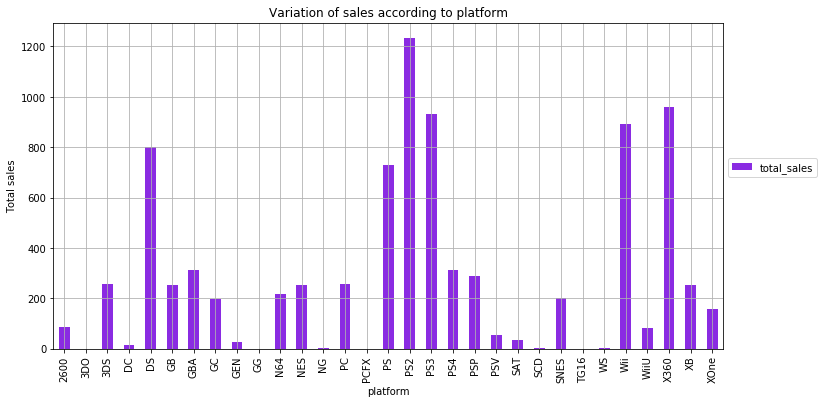

In [23]:
(df
   .pivot_table(index='platform', values='total_sales', aggfunc='sum')
   .plot(kind='bar', grid=True, figsize=(12, 6), title='Variation of sales according to platform', color='blueviolet')
)
plt.ylabel("Total sales")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show()     

As we see the Top-5 platforms with the biggest sales are: PS2, X360, PS3, Wii and DS

In [24]:
df_top = (df
                        .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                        .reset_index()
                        .sort_values(by='total_sales', ascending=False)
                        .head(6)
                        .reset_index(drop=True)
                   )
df_top

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [25]:
platforms = df_top['platform']

In [26]:
top_year = (df
                      .loc[df['platform'].isin(platforms)]
                      .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                      .reset_index()
                 )
top_year.tail()

,platform,year_of_release,total_sales
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96
66,X360,2016,1.52


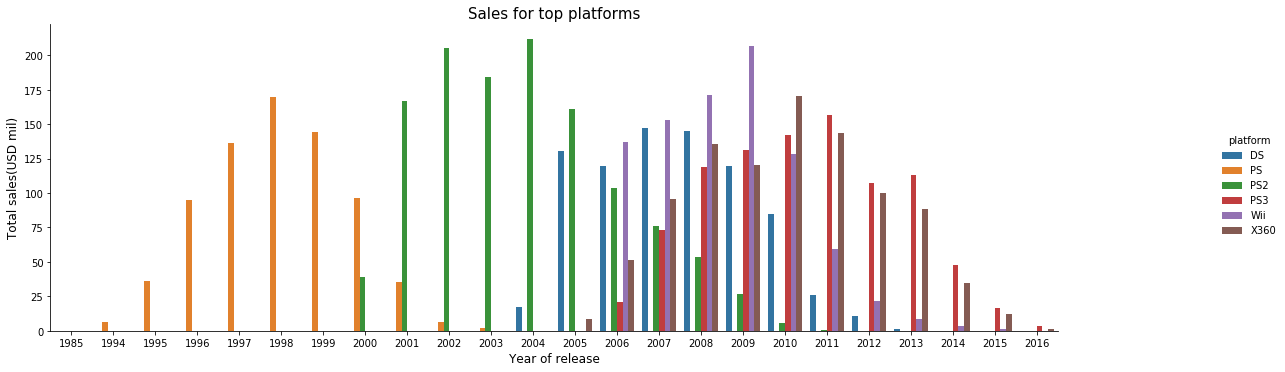

In [27]:
plot = sns.catplot("year_of_release", "total_sales", hue="platform", kind="bar", data=top_year)
plt.title("Sales for top platforms", fontsize=15)
plt.xlabel('Year of release', fontsize=12)
plt.ylabel('Total sales(USD mil)', fontsize=12)
plot.fig.set_size_inches(20,5)
plt.show()

As we see the lifecircle for platform in average 10 years. Every 10 years appears a new platform or a new version of old platform. So we see that for example PS platform was on peak in 1994-2000 years, but after 2003 it dissapeared because there was new version PS2 was released. Same situation with PS2 which died after PS3 appeared. Till 2017 we see only 2 platform which still in use: PS3 and X360.
Since till 2007 we don't have much data and variety of platforms, besides that in this period there weren't a lot of games released, logical will be to take a time period of 2007-2015 for our further investigation.

In [28]:
games_actual = df.query('year_of_release >= 2013 & year_of_release <= 2015')

### Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms. Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [29]:
platform_act = games_actual.pivot_table(index='platform', columns='year_of_release', values='total_sales', aggfunc='sum')
platform_act

year_of_release,2013,2014,2015
platform,,,
3DS,56.57,43.76,27.78
DS,1.54,NaN,NaN
PC,12.38,13.28,8.52
PS3,113.25,47.76,16.82
PS4,25.99,100.00,118.90
PSP,3.14,0.24,0.12
PSV,10.59,11.90,6.25
Wii,8.59,3.75,1.14
WiiU,21.65,22.03,16.35


So we got platforms that will be actual in 2017 year. Let's drop empty columns.

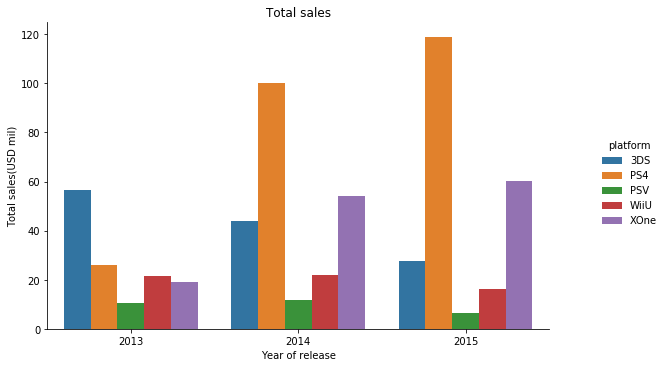

In [30]:
platform_act = (games_actual
                              .loc[(games_actual['platform'].isin(("3DS", "PS4", "PSV", "WiiU", "XOne"))==True) & (
                                  games_actual['year_of_release'].isin((2011, 2012, 2013, 2014, 2015))==True)]
                              .pivot_table(index=['platform', 'year_of_release'], values='total_sales', aggfunc='sum')
                              .reset_index()
                 )
plot = sns.catplot(x='year_of_release', y='total_sales', hue="platform", kind="bar", data=platform_act)
plt.title("Total sales", fontsize=12)
plt.xlabel('Year of release', fontsize=10)
plt.ylabel('Total sales(USD mil)', fontsize=10)
plot.fig.set_size_inches(10,5)

So now we can see the most profitable and actual platforms. 3DS which is still actuall through years. PSV which is also got their segment, but comparing with others has not such a big sails,  think because it doesn't have a big variety of games. PS4 which appeared in 2013 and grows up each year, XOne the same as PS4 and WiiU which has their segment and also grows up.

### Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.

In [31]:
profit_platform = pd.Series(platform_act['platform'].unique())
games_popular = games_actual.loc[games_actual['platform'].isin(profit_platform)==True].reset_index(drop=True)
games_popular.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
1,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
2,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
3,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,unknown,11.68
4,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [32]:
name_sale = games_popular.pivot_table(index=['platform', 'name'], values='total_sales', aggfunc='sum').reset_index()
name_sale.head()

,platform,name,total_sales
0,3DS,Fire Emblem Fates,1.67
1,3DS,Frozen: Olaf's Quest,0.59
2,3DS,12-Sai. Honto no Kimochi,0.07
3,3DS,7th Dragon III Code: VFD,0.16
4,3DS,A-Train: City Simulator,0.06


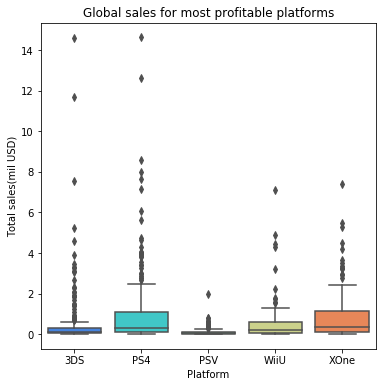

In [33]:
fig = plt.subplots(figsize=(6,6))
plt.title("Global sales for most profitable platforms")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow')
plt.xlabel('Platform')
plt.ylabel('Total sales(mil USD)')
plt.show()

We see that for each platform we have a lot of games with total sales outliying from the main picture. The difference between total sales for games for 3DS and for PS4 is significant, a little bit smaller between WiiU and XOne, and not very big for PSV.
Let's see which sales we have without outliers.

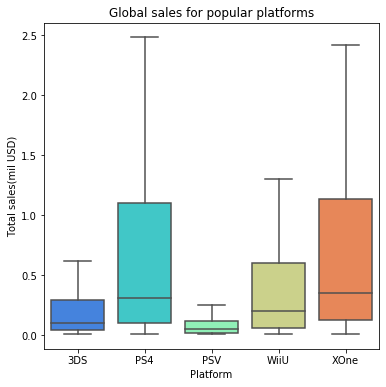

In [34]:
fig = plt.subplots(figsize=(6,6))
plt.title("Global sales for popular platforms")
plot = sns.boxplot(x="platform", y="total_sales", data=name_sale, palette='rainbow', showfliers=False)
plt.xlabel('Platform')
plt.ylabel('Total sales(mil USD)')
plt.show()

Across all platforms, there is an excess of the average value over the median and bevel datasets to the right: for Playstation4 and XBoxOne the most strong, for 3DS and WiiU - slightly less, and for PlayStationVita - relatively small. We also see differences in median values: Playstation4 and XBoxOne have similar boxplots (quartile, average and median values), and The WiiU is characterized by a lower value; then there's 3DS and PlayStationVita.
It can be because PS4 and XOne are the most poplular platforms and they have a big choice of games with different prices, WiiU also a pretty old and famous platform but it hasn't such a big choice of games, but has their fans, same as 3DS. As for PSV we see that it doesn't have lot of games, and those games are almost equal in price and sales.


### Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.

In [35]:
df_ps4 = df[df['platform'] == 'PS4']
df_ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


In [36]:
matrix = df_ps4[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score']].corr()
matrix

,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score
na_sales,1.000000,0.785362,0.472981,0.944259,0.928160,0.415008,-0.020933
eu_sales,0.785362,1.000000,0.464563,0.944698,0.958157,0.346720,-0.048925
jp_sales,0.472981,0.464563,1.000000,0.496467,0.527129,0.322358,0.171332
other_sales,0.944259,0.944698,0.496467,1.000000,0.998051,0.409191,-0.035639
total_sales,0.928160,0.958157,0.527129,0.998051,1.000000,0.406568,-0.031957
critic_score,0.415008,0.346720,0.322358,0.409191,0.406568,1.000000,0.557654
user_score,-0.020933,-0.048925,0.171332,-0.035639,-0.031957,0.557654,1.000000


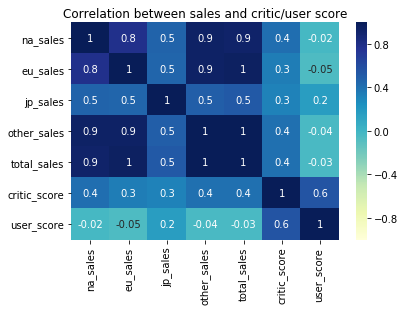

<Figure size 648x360 with 0 Axes>

In [37]:
sns.heatmap(data=matrix, vmin = -1, vmax = +1, annot = True, fmt='.1g', cmap = 'YlGnBu')
plt.title('Correlation between sales and critic/user score')
plt.figure(figsize=(9, 5))
plt.show()

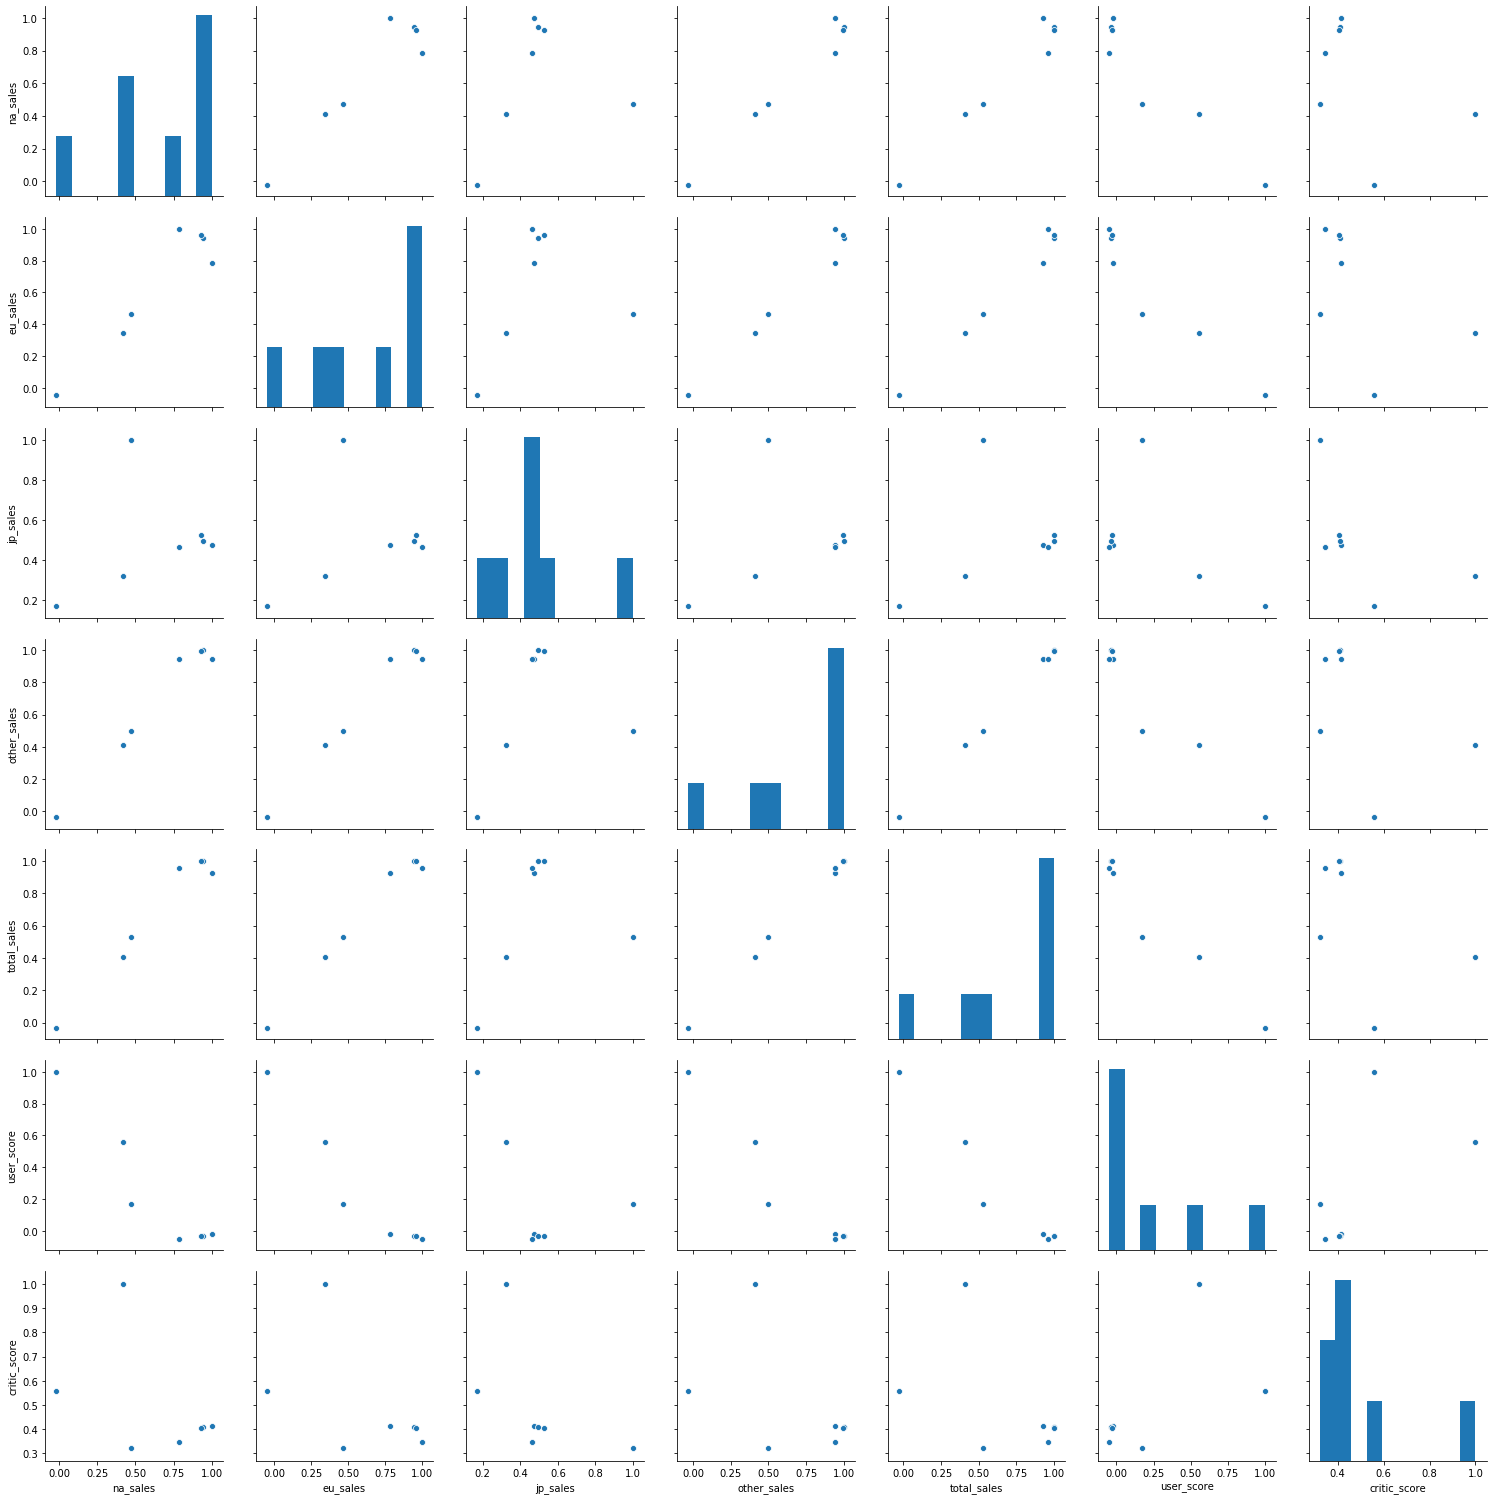

In [38]:
sns.pairplot(matrix[['na_sales','eu_sales','jp_sales','other_sales','total_sales','user_score','critic_score']], height=3)

As we see there is no strong correlation between reviews and sales. According to heatmap and scatter plots buyers trust a little bit more to ctitics compared to other users, but still reviews don't affect sales a lot.

### Keeping your conclusions in mind, compare the sales of the same games on other platforms.

In [39]:
games_others = games_actual.loc[games_actual['platform'].isin(profit_platform)!=True].reset_index(drop=True)

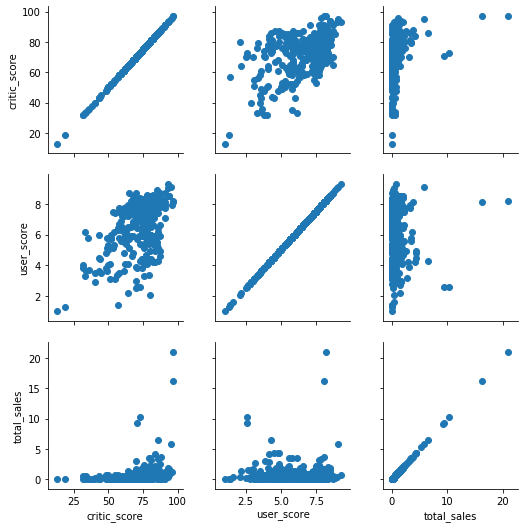

In [40]:
Scaterplots = sns.PairGrid(games_others[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
plt.show()

In [41]:
correlation = games_others.corr()
correlation

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.148544,-0.119006,-0.134323,-0.129834,0.039801,-0.088841,-0.147962
na_sales,-0.148544,1.000000,0.786201,0.209370,0.791090,0.246296,-0.036054,0.934735
eu_sales,-0.119006,0.786201,1.000000,0.340050,0.945563,0.265335,-0.035256,0.947993
jp_sales,-0.134323,0.209370,0.340050,1.000000,0.415843,0.146736,0.181326,0.362831
other_sales,-0.129834,0.791090,0.945563,0.415843,1.000000,0.235472,-0.006861,0.940946
critic_score,0.039801,0.246296,0.265335,0.146736,0.235472,1.000000,0.492082,0.267658
user_score,-0.088841,-0.036054,-0.035256,0.181326,-0.006861,0.492082,1.000000,-0.022353
total_sales,-0.147962,0.934735,0.947993,0.362831,0.940946,0.267658,-0.022353,1.000000


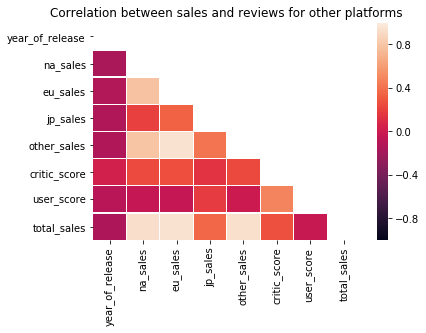

In [42]:
fig, ax = plt.subplots()
plt.title("Correlation between sales and reviews for other platforms")
mask = np.triu(np.ones_like(correlation, dtype=np.bool))
sns.heatmap(correlation, vmin=-1, vmax=1, linewidths=.3, mask=mask, ax=ax)
plt.show()

The correlation between total sales and critic score is 0.23 and between sales and user score 0.08, so we can say that we have a weak correlation here.

### Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [43]:
df_genre = games_actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

df_genre

,genre,total_sales
0,Action,291.76
1,Shooter,194.76
2,Role-Playing,127.71
3,Sports,127.16
4,Misc,60.22
5,Platform,39.40
6,Racing,37.10
7,Fighting,30.84
8,Simulation,19.87
9,Adventure,19.82


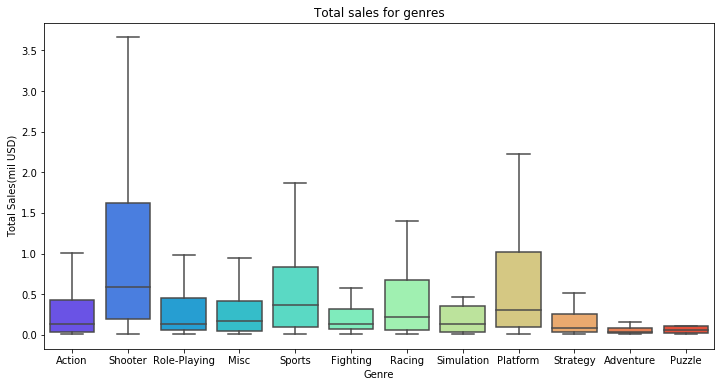

In [44]:
fig = plt.subplots(figsize=(12,6))
plt.title("Total sales for genres")
plot = sns.boxplot(x="genre", y="total_sales", data=games_actual, palette='rainbow', showfliers=False)
plt.xlabel('Genre')
plt.ylabel('Total Sales(mil USD)')
plt.show()

The most profitable genre is "Action", while the main buyers spent not so much money on the purchase of games in this genre. That is, the profitability of the genre is associated with the sale of several, knocked out, expensive games.  In second place in terms of income for the analyzed current period is the genre of "Sports", but sports games are characterized by the same situation as for games in the genre of "Action": super-profitability is most likely associated with the sale of some very expensive games, but is not a rule for the entire genre. 
The situation is different with the third most profitable position: the genre of "Shooter". This is the most profitable, on average, direction of games, which is in high demand. The average and median sales levels of this genre are higher than the values for any other genre; as well as the dataset in the context of this genre is strongly beveled to the right (a lot of buyers buy individual games with a high price), which means that this is a promising direction for sale.
Strategies brought the lowest income, but this does not mean that buyers buy the cheapest games in this genre, in comparison with other genres. We see a similar situation for both Action and Sport, but acting in a mirror way. The genre "Quest" has a similar characteristic of salesability to "Strategy": they are poorly sold and brought minimal income, but these are not the most unpromising genres.
The most unpromising genre of games for sale is "Adventure". He is in third place from the bottom in total sales; and by distribution, the largest number of games were sold for the lowest cost compared to other genres.

### Conclusion.
As we see the amount of games released grew up since 1980 and till 2008. In 2006-2008 was the biggest amount of games released. And then we see that releasing of new games reduced dramatically up to 2013.
The lifecircle for platform in average 10 years. Every 10 years appears a new platform or a new version of old platform. So we see that for example PS platform was on peak in 1994-2000 years, but after 2003 it dissapeared because there was new version PS2 was released. 
Same situation with PS2 which died after PS3 appeared. Till 2017 we see only 2 platform which still in use: PS3 and X360.
Since till 2007 we don't have much data and variety of platforms, besides that in this period there weren't a lot of games released, logical will be to take a time period of 2007-2015 for our further investigation.
The most profitable and actual platforms are: 3DS which is still actuall through years. PSV which is also got their segment, but comparing with others has not such a big sails,  think because it doesn't have a big variety of games. PS4 which appeared in 2013 and grows up each year, XOne the same as PS4 and WiiU which has their segment and also grows up.
Across all the popular platforms, there is an excess of the average value over the median and bevel datasets to the right: for Playstation4 and XBoxOne the most strong, for 3DS and WiiU - slightly less, and for PlayStationVita - relatively small. We also see differences in median values: Playstation4 and XBoxOne have similar boxplots (quartile, average and median values), and The WiiU is characterized by a lower value; then there's 3DS and PlayStationVita.
It can be because PS4 and XOne are the most poplular platforms and they have a big choice of games with different prices, WiiU also a pretty old and famous platform but it hasn't such a big choice of games, but has their fans, same as 3DS. As for PSV we see that it doesn't have lot of games, and those games are almost equal in price and sales.
There is no strong correlation between reviews and sales. According to heatmap and scatter plots buyers trust a little bit more to ctitics compared to other users, but still reviews don't affect sales a lot.
The most profitable genre is "Action", while the main buyers spent not so much money on the purchase of games in this genre. That is, the profitability of the genre is associated with the sale of several, knocked out, expensive games.  In second place in terms of income for the analyzed current period is the genre of "Sports", but sports games are characterized by the same situation as for games in the genre of "Action": super-profitability is most likely associated with the sale of some very expensive games, but is not a rule for the entire genre. 
The situation is different with the third most profitable position: the genre of "Shooter". This is the most profitable, on average, direction of games, which is in high demand. The average and median sales levels of this genre are higher than the values for any other genre; as well as the dataset in the context of this genre is strongly beveled to the right (a lot of buyers buy individual games with a high price), which means that this is a promising direction for sale.
Strategies brought the lowest income, but this does not mean that buyers buy the cheapest games in this genre, in comparison with other genres. We see a similar situation for both Action and Sport, but acting in a mirror way. The genre "Quest" has a similar characteristic of salesability to "Strategy": they are poorly sold and brought minimal income, but these are not the most unpromising genres.
The most unpromising genre of games for sale is "Adventure". He is in third place from the bottom in total sales; and by distribution, the largest number of games were sold for the lowest cost compared to other genres.


## Create a user profile for each region


# To do list:
For each region (NA, EU, JP), determine:
 -  The top five platforms. Describe variations in their market shares from region to region.
 -  The top five genres. Explain the difference.
 -  Do ESRB ratings affect sales in individual regions?

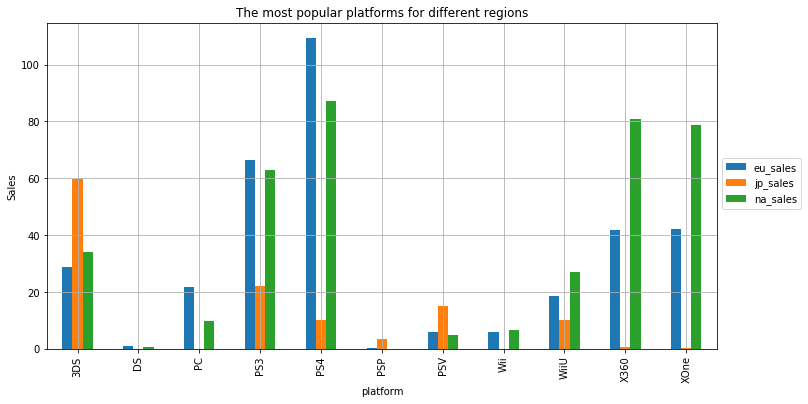

In [45]:
(games_actual 
   .pivot_table(index='platform', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
   .plot(kind='bar', grid=True, figsize=(12, 6), title='The most popular platforms for different regions')
)
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show() 

The Top-5 popular platforms for EU are: PS4, PS3, X360, XOne and 3DS, for NA: PS4, X360, XOne, PS3 and 3DS, for JP: 3DS, PS3, PSV, PS4 and WiiU. PS4 is the platform that is very popular, we can see that europeans, japanese and american users prefer this platform a lot. But also we see the difference between tastes of japanese users and other. The most popular platform in Japane is 3DS, I guess because they have a lot of games released for this platform in Japane such as in USA. Europe and American users are more conservative, they prefer PS4, PS3 and X360, the most populat platforms around the world. WiiU also popular  in Japane but less in Europe and USA. 

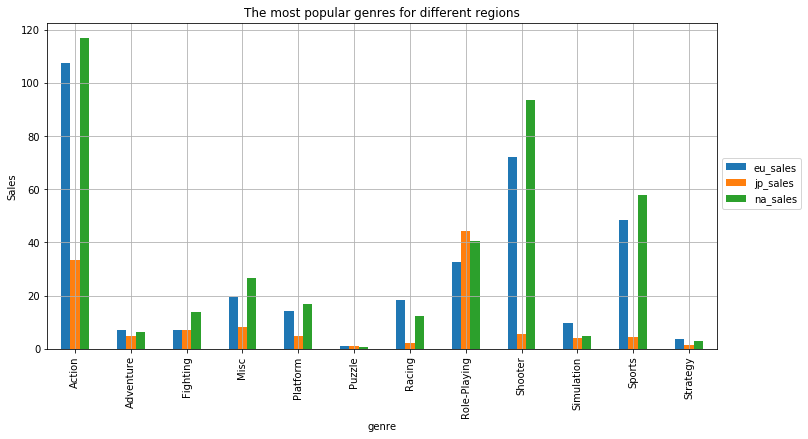

In [46]:
(games_actual 
   .pivot_table(index='genre', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
   .plot(kind='bar', grid=True, figsize=(12, 6), title='The most popular genres for different regions')
)
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show() 

For NA region the Top-5 genres are: Action, Sports, Shooter, Role-Playing and Misc. For Europe: Action, Sports, Shooter, Role-Playing and Misc. And for Japane: Role-Playing and Action. As we see the picture for NA and EU regions almost identical, the most played genres are Action and Shooter, while in Japane most people prefer RPG games. It can be connected with mentality of nation. Japenese love their culture like anime cartoons, cosplaying, they like to play some role, so it can be a reason that RPG genre is a favorite for them. 

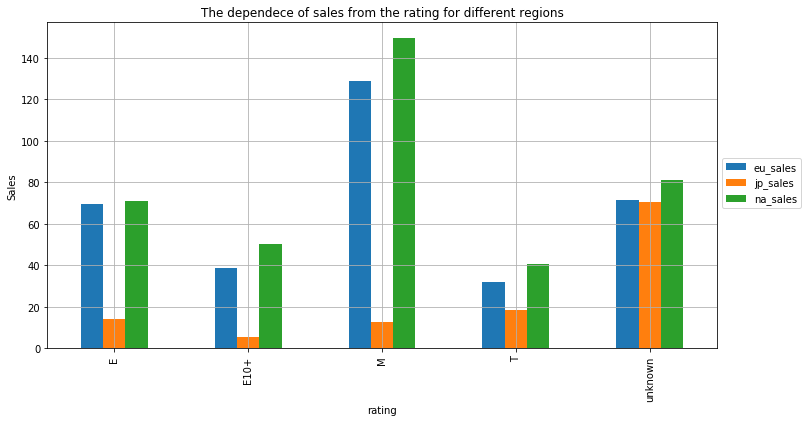

In [47]:
(games_actual 
   .pivot_table(index='rating', values=['na_sales','eu_sales','jp_sales'], aggfunc='sum')
   .plot(kind='bar', grid=True, figsize=(12, 6), title='The dependece of sales from the rating for different regions')
)
plt.ylabel("Sales")
plt.legend(bbox_to_anchor=(1, 0.6))
plt.show() 

Obviously ESRB rating affects sales in every region. The most selling games in Eorpe and USA have rating M. Also a lot of games were sold with E rating. But still we have a big part of games that were sold (and even took a first place in Japane for selling) have unknown rating. I guess that those games are also have rating for adults.

### Conclusion
The Top-5 popular platforms for EU are: PS2, PS3, X360, Wii and PS, for NA: X360, PS2, Wii, PS3 and DS, for JP: DS, PS, PS2, SNES and NES. PS2 is the platform that is very popular, we can see that europeans, japanese and american users prefer this platform a lot. But also we see the difference between tastes of japanese users and other. The most popular platform in Japane is DS, I guess because they have a lot of games released for this platform in Japane such as in USA. Europe and American users are more conservative, they prefer PS2, PS3 and X360, the most populat platforms around the world. Wii also popular but in Japane less than in Europe and USA. And platforms NES and SNES are very popular in Japane but not popular at all in Europe.
For NA region the Top-5 genres are: Action, Sports, Shooter, Platform and Misc. For Europe: Action, Sports, Shooter, Racing and Misc. And for Japane: Role-Playing, Action, Sports, Platform and Misc. As we see the picture for NA and EU regions almost identical, the most played genres are Action, Sports and Shooter, while in Japane most people prefer RPG games. It can be connected with mentality of nation. Japenese love their culture like anime cartoons, cosplaying, they like to play some role, so it can be a reason that RPG genre is a favorite for them. In other Japanese again have similar tastes with NA players, maybe because they have same popular platforms.
Obviously ESRB rating affects sales in every region. The most selling games have rating E which means for Everyone. On second place in USA are games with rating M, wich means Mature or 17+, in Japane on the second place games with rating Teens or 13+, on the third place in Europe in USA games with rating T and in Japane games with rating M. And less sales have games with rating E10+. I think it connected with style of life. There is a difference between western style of life, where teenagers and young people can play games for more long period of time, while japanese play less after they grew up, they need to work a lot and there is no free time for playing games.

## Test the hypotheses:
 -  Average user ratings of the Xbox One and PC platforms are the same.
 -  Average user ratings for the Action and Sports genres are different.

### Average user ratings of the Xbox One and PC platforms are the same.

Before we formulate and check our hypotese, let's see if we have a normal distribution

In [48]:
xboxone_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "XOne")]
pc_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['platform'] == "PC")]

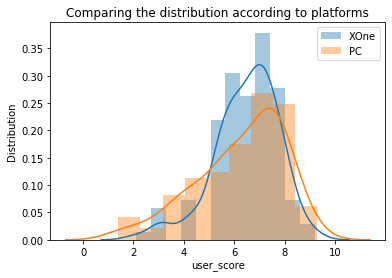

In [49]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('Distribution')
plt.title('Comparing the distribution according to platforms')
sns.distplot(xboxone_games['user_score'], label='XOne')
sns.distplot(pc_games['user_score'], label='PC')
plt.legend()
plt.show()

We have a right-skewed but normal distribution.

 Here is our hypothesis:

Null hypothesis: There are no statistically differences between the average user raitings for XBox One and PC platforms.

Alternative hypothesis: There are statisticaly difference between the average user raitings for XBox One and PC platforms.

A significance level, also known as alpha we will take as 0.05 as the most common nowadays.

In [50]:
sample_1 = xboxone_games['user_score']
sample_2 = pc_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis (there are statisticall differences)!")
else:
    print("We can't reject the null hypothesis (there are no statisticall differences)!")

p-value: 0.2867036680187632
We can't reject the null hypothesis (there are no statisticall differences)!


In [51]:
print('Average user rating for Xbox One is:', round(np.mean(sample_1)))
print('Average user rating for PC is:', round(np.mean(sample_2)))

Average user rating for Xbox One is: 6
Average user rating for PC is: 6


We have statisticall difference between XBox One and PC user ratings.

### Average user ratings for the Action and Sports genres are different.

In [52]:
action_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Action")]
sports_games = games_actual.loc[(games_actual['user_score'].isna()!=True) & (games_actual['genre'] == "Sports")]

First of all need to check distribution.

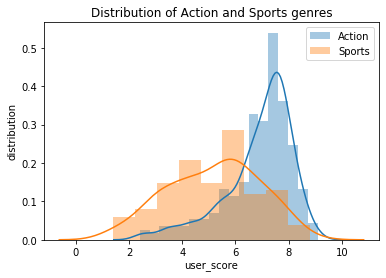

In [53]:
fig = plt.figure()
plt.xlabel('xlabel')
plt.ylabel('distribution')
plt.title('Distribution of Action and Sports genres')
sns.distplot(action_games['user_score'], label='Action')
sns.distplot(sports_games['user_score'], label='Sports')
plt.legend()
plt.show()

We have normal distribution. Let's write our hypotheses:
Null hypothesis: There are no statistically differences between the average user raitings for Action and Sports genres.

Alternative hypothesis: There are statisticaly difference between the average user raitings for Action and Sports genres.

A significance level, also known as alpha we will take as 0.05 as the most common nowadays.

In [54]:
sample_1 = action_games['user_score']
sample_2 = sports_games['user_score']

alpha = .05

results = st.ttest_ind(sample_1, sample_2, equal_var=False)
print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("We reject the null hypothesis (there are statisticall differences)!")
else:
    print("We can't reject the null hypothesis (there are no statisticall differences)!")

p-value: 3.5076737062533683e-19
We reject the null hypothesis (there are statisticall differences)!


In [55]:
print('Average user rating for Action genre is:', round(np.mean(sample_1)))
print('Average user rating for Sport genre is:', round(np.mean(sample_2)))

Average user rating for Action genre is: 7
Average user rating for Sport genre is: 5


We have statisticall difference between Action and Sports user ratings.

### Conclusion
After testing hypothesys we can see that there are statisticall differences between XBox One and PC average user rationg, as like as between Action and Sports average user ratings.

# Overall conclusion.
We had a data from store "Ice" which sell video games all over the world. 
After examinating of the data we have I found 2 columns with data types needed to convert. So I converted year_of_release column from float type to int and user_score from object type to float. Also I changed the names of the columns to the lowercase. In columns name, year_of_release and genre we had a missing values, but it was such a small percent that I decided to drop all missing values from those columns. And very interesting situation we have in columns critic_score, user_score and rating. Since we have a big percentage of missing values there I was needed to analyze what can be a reason of it. After researching I can assume that those 3 columns are connected between each other. Till the 1997 this is very logical that we have missing values because game industry a little bit elder than internet itself. Internet for people usage started to work in 90's but in our data we have games released at 80's and it is obvious that we don't have any scores or raiting for them, since that time people didn't have a lot opportunities to share their thoughts with other people except their friends. The ESRB rating was founded only in 1994 (after the 1993 hearings in US senate about violence in Mortal Kombat video game), so we have 10 years at least when games were without any rating. Interesting that till the 1997 we have equal amount of missing values for those 3 columns. But after we can see that in 00's game industry started to grow very fast, and each year we have more and more missing values in user and critic_score columns and less in rating column, which can say us that ESRB works pretty good and try to give the rating to as much new games as possible, while critics and users may not be so attitude. As usual we have critic and user scores for famous and popular games with good advertising campaign, but still we have more and more new games each year which are not so popular and a lot of people don't pay any attention of them, such as critics. Except of this in Europe for example there is their own rating system PEGI, so we could have a situation where game released in Europe has PEGI raiting and doesn't have ESRB raiting. Searching and replacing user and critic scores for the same game but for different platform is also not usefull for me. Becauce it happens that the same game has a different scores for different platforms. I decided don't remove those missing values since I think it make sence that we don't have scores or ratings for games and repplacing or dropping missing values will affect results of further calculations a lot.
The amount of games released grew up since 1980 and till 2008. In 2006-2008 was the biggest amount of games released. And then we see that releasing of new games reduced dramatically up to 2013.
The lifecircle for platform in average 10 years. Every 10 years appears a new platform or a new version of old platform. So we see that for example PS platform was on peak in 1994-2000 years, but after 2003 it dissapeared because there was new version PS2 was released. 
Same situation with PS2 which died after PS3 appeared. Till 2017 we see only 2 platform which still in use: PS3 and X360.
Since till 2007 we don't have much data and variety of platforms, besides that in this period there weren't a lot of games released, logical will be to take a time period of 2007-2015 for our further investigation.
The most profitable and actual platforms are: 3DS which is still actuall through years. PSV which is also got their segment, but comparing with others has not such a big sails,  think because it doesn't have a big variety of games. PS4 which appeared in 2013 and grows up each year, XOne the same as PS4 and WiiU which has their segment and also grows up.
Across all the popular platforms, there is an excess of the average value over the median and bevel datasets to the right: for Playstation4 and XBoxOne the most strong, for 3DS and WiiU - slightly less, and for PlayStationVita - relatively small. We also see differences in median values: Playstation4 and XBoxOne have similar boxplots (quartile, average and median values), and The WiiU is characterized by a lower value; then there's 3DS and PlayStationVita.
It can be because PS4 and XOne are the most poplular platforms and they have a big choice of games with different prices, WiiU also a pretty old and famous platform but it hasn't such a big choice of games, but has their fans, same as 3DS. As for PSV we see that it doesn't have lot of games, and those games are almost equal in price and sales.
There is no strong correlation between reviews and sales. According to heatmap and scatter plots buyers trust a little bit more to ctitics compared to other users, but still reviews don't affect sales a lot.
The most profitable genre is "Action", while the main buyers spent not so much money on the purchase of games in this genre. That is, the profitability of the genre is associated with the sale of several, knocked out, expensive games.  In second place in terms of income for the analyzed current period is the genre of "Sports", but sports games are characterized by the same situation as for games in the genre of "Action": super-profitability is most likely associated with the sale of some very expensive games, but is not a rule for the entire genre. 
The situation is different with the third most profitable position: the genre of "Shooter". This is the most profitable, on average, direction of games, which is in high demand. The average and median sales levels of this genre are higher than the values for any other genre; as well as the dataset in the context of this genre is strongly beveled to the right (a lot of buyers buy individual games with a high price), which means that this is a promising direction for sale.
Strategies brought the lowest income, but this does not mean that buyers buy the cheapest games in this genre, in comparison with other genres. We see a similar situation for both Action and Sport, but acting in a mirror way. The genre "Quest" has a similar characteristic of salesability to "Strategy": they are poorly sold and brought minimal income, but these are not the most unpromising genres.
The most unpromising genre of games for sale is "Adventure". He is in third place from the bottom in total sales; and by distribution, the largest number of games were sold for the lowest cost compared to other genres.
The Top-5 popular platforms for EU are: PS4, PS3, X360, XOne and 3DS, for NA: PS4, X360, XOne, PS3 and 3DS, for JP: 3DS, PS3, PSV, PS4 and WiiU. PS4 is the platform that is very popular, we can see that europeans, japanese and american users prefer this platform a lot. But also we see the difference between tastes of japanese users and other. The most popular platform in Japane is 3DS, I guess because they have a lot of games released for this platform in Japane such as in USA. Europe and American users are more conservative, they prefer PS4, PS3 and X360, the most populat platforms around the world. WiiU also popular  in Japane but less in Europe and USA. 
For NA region the Top-5 genres are: Action, Sports, Shooter, Role-Playing and Misc. For Europe: Action, Sports, Shooter, Role-Playing and Misc. And for Japane: Role-Playing and Action. As we see the picture for NA and EU regions almost identical, the most played genres are Action and Shooter, while in Japane most people prefer RPG games. It can be connected with mentality of nation. Japenese love their culture like anime cartoons, cosplaying, they like to play some role, so it can be a reason that RPG genre is a favorite for them. 
Obviously ESRB rating affects sales in every region. The most selling games in Eorpe and USA have rating M. Also a lot of games were sold with E rating. But still we have a big part of games that were sold (and even took a first place in Japane for selling) have unknown rating. I guess that those games are also have rating for adults.
After testing hypothesys we can see that there are statisticall differences between XBox One and PC average user rationg, as like as between Action and Sports average user ratings.
